In [2]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [3]:
# Load Datasets
user_data = pd.read_csv('/content/user_data.csv')
market_data = pd.read_csv('/content/market_data.csv')
esg_data = pd.read_csv('/content/esg_data.csv')

In [4]:
# user_data dataset
print("User Data:\n")
user_data.head()

User Data:



,Name,Gender,Age,Income,Expenses,Savings,FinancialGoal,RiskAppetite,ESGScore,SustainableInvestments,EducationLevel,EmploymentStatus,InvestmentHorizon,EthicalConsiderations
0,Terry Higgins,Male,23,74540.478317,43858.724606,38979.846734,109878.694932,0.778975,43.235842,Yes,College,Unemployed,Short Term,Governance
1,Rebecca Clark,Male,60,109410.552873,12316.237761,29597.681152,62761.848120,0.326132,80.635320,Yes,Graduate,Employed,Long Term,Governance
2,Molly Carlson,Female,31,88883.403320,13448.511936,32152.413978,125273.467341,0.098064,31.010131,No,College,Employed,Long Term,Social Responsibility
3,Lindsey Wilson,Male,59,72352.816803,27379.343544,39926.603531,166073.770483,0.737748,68.496194,No,Graduate,Self-Employed,Long Term,Social Responsibility
4,Anthony House,Male,58,78302.167436,28134.873692,48393.042041,69556.276234,0.869886,13.128667,No,College,Employed,Short Term,Social Responsibility


In [5]:
# market_data dataset
print("Market Data:\n")
market_data.head()

Market Data:



,Year,SustainableInvestmentIndex,GDPGrowthRate,InflationRate,InterestRate,StockMarketIndex,CurrencyExchangeRate,CommoditiesPrices,RealEstatePrices,IndustryTrends
0,2020,1456.487295,2.181168,1.112553,2.585248,8605.696839,0.949745,96.396243,435990.854342,Upward
1,2021,1397.776550,2.778688,1.088173,0.939578,8727.286192,1.146163,83.646498,438298.373875,Stable
2,2022,1105.042492,4.149496,0.873655,1.376999,9980.587606,0.994098,91.747332,413234.975301,Downward
3,2023,1048.562852,3.798247,2.834376,1.652680,7029.223162,0.867648,166.702154,309647.333318,Downward
4,2024,1321.017786,3.272925,0.474907,2.410287,8092.299957,1.010095,168.391137,191348.528091,Downward


In [6]:
# esg_data dataset
print("ESG Data:\n")
esg_data.head()

ESG Data:



,Company,ESGScores,EnvironmentalPerformance,SocialPerformance,GovernancePerformance,ESGRating,ESGCategory
0,"Armstrong, Harvey and Montoya",52.294880,37.079113,28.264642,42.001395,AA,Average
1,Sims-Clarke,24.469225,30.623239,33.375257,96.156876,A,Outperformers
2,Holland-Riley,79.726986,72.670964,6.710948,10.006602,BBB,Outperformers
3,Mullen Ltd,18.268466,82.923129,7.555257,36.039244,A,Average
4,Vaughn-Gomez,93.633344,31.534665,9.214352,30.998172,B,Outperformers


In [7]:
# Encode categorical variables in User Data
le_user = LabelEncoder()
user_data['Gender'] = le_user.fit_transform(user_data['Gender'])
user_data['SustainableInvestments'] = le_user.fit_transform(user_data['SustainableInvestments'])
user_data['EducationLevel'] = le_user.fit_transform(user_data['EducationLevel'])
user_data['EmploymentStatus'] = le_user.fit_transform(user_data['EmploymentStatus'])
user_data['InvestmentHorizon'] = le_user.fit_transform(user_data['InvestmentHorizon'])
user_data['EthicalConsiderations'] = le_user.fit_transform(user_data['EthicalConsiderations'])

# Encode categorical variables in Market Data
le_market = LabelEncoder()
market_data['IndustryTrends'] = le_market.fit_transform(market_data['IndustryTrends'])

# Encode categorical variables in ESG Data
le_esg = LabelEncoder()
esg_data['ESGRating'] = le_esg.fit_transform(esg_data['ESGRating'])
esg_data['ESGCategory'] = le_esg.fit_transform(esg_data['ESGCategory'])

In [8]:
# Explore the user_data dataset
print("User Data EDA:\n")
print(user_data.info())

User Data EDA:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    1000 non-null   object 
 1   Gender                  1000 non-null   int64  
 2   Age                     1000 non-null   int64  
 3   Income                  1000 non-null   float64
 4   Expenses                1000 non-null   float64
 5   Savings                 1000 non-null   float64
 6   FinancialGoal           1000 non-null   float64
 7   RiskAppetite            1000 non-null   float64
 8   ESGScore                1000 non-null   float64
 9   SustainableInvestments  1000 non-null   int64  
 10  EducationLevel          1000 non-null   int64  
 11  EmploymentStatus        1000 non-null   int64  
 12  InvestmentHorizon       1000 non-null   int64  
 13  EthicalConsiderations   1000 non-null   int64  
dtypes: float64(6), int64(7), 

In [9]:
print(user_data.describe())

            Gender          Age         Income      Expenses       Savings  \
count  1000.000000  1000.000000    1000.000000   1000.000000   1000.000000   
mean      0.486000    41.568000   75363.387054  30189.979819  26868.554067   
std       0.500054    13.662944   25684.294011  11754.655058  12634.805154   
min       0.000000    18.000000   30060.833836  10006.788619   5004.155588   
25%       0.000000    29.000000   54060.463549  19972.939068  15776.848289   
50%       0.000000    41.000000   75708.082166  30238.433003  26875.216623   
75%       1.000000    53.000000   96546.300841  40551.912375  37474.151166   
max       1.000000    65.000000  119990.959731  49984.229872  49942.767876   

       FinancialGoal  RiskAppetite     ESGScore  SustainableInvestments  \
count    1000.000000   1000.000000  1000.000000             1000.000000   
mean   125329.845851      0.507358    48.647290                0.516000   
std     42758.297163      0.293872    28.346421                0.499994 

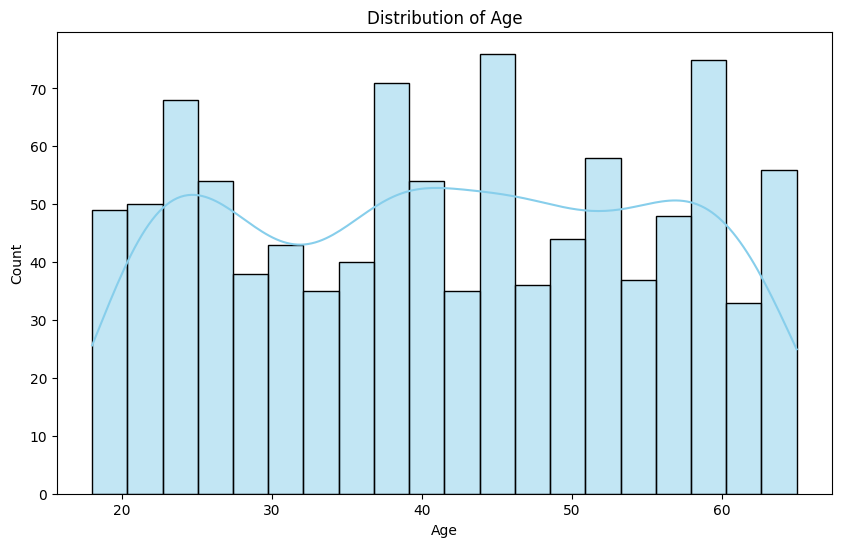

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(user_data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

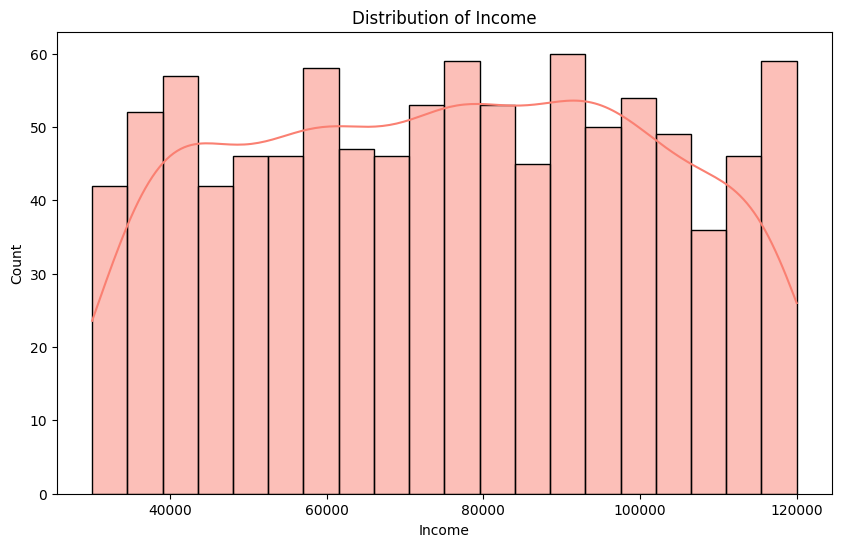

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(user_data['Income'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

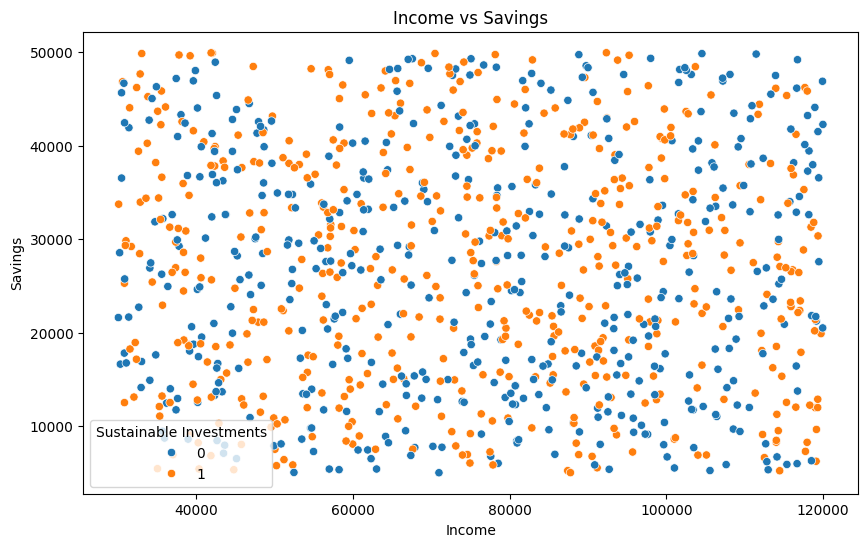

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Savings', data=user_data, hue='SustainableInvestments')
plt.title('Income vs Savings')
plt.xlabel('Income')
plt.ylabel('Savings')
plt.legend(title='Sustainable Investments')
plt.show()

In [13]:
# Explore the market_data dataset
print("Market Data EDA:\n")
print(market_data.info())

Market Data EDA:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        10 non-null     int64  
 1   SustainableInvestmentIndex  10 non-null     float64
 2   GDPGrowthRate               10 non-null     float64
 3   InflationRate               10 non-null     float64
 4   InterestRate                10 non-null     float64
 5   StockMarketIndex            10 non-null     float64
 6   CurrencyExchangeRate        10 non-null     float64
 7   CommoditiesPrices           10 non-null     float64
 8   RealEstatePrices            10 non-null     float64
 9   IndustryTrends              10 non-null     int64  
dtypes: float64(8), int64(2)
memory usage: 928.0 bytes
None


In [14]:
print(market_data.describe())

             Year  SustainableInvestmentIndex  GDPGrowthRate  InflationRate  \
count    10.00000                   10.000000      10.000000      10.000000   
mean   2024.50000                 1231.367187       2.923343       1.414663   
std       3.02765                  164.498672       0.935276       0.713621   
min    2020.00000                 1037.034778       1.592096       0.474907   
25%    2022.25000                 1109.372925       2.160583       0.935522   
50%    2024.50000                 1187.894121       3.025807       1.216070   
75%    2026.75000                 1378.586859       3.693113       1.782726   
max    2029.00000                 1456.487295       4.149496       2.834376   

       InterestRate  StockMarketIndex  CurrencyExchangeRate  \
count     10.000000         10.000000             10.000000   
mean       1.562363       7662.212992              0.991818   
std        0.659655       1469.879935              0.131935   
min        0.584014       5779.38428

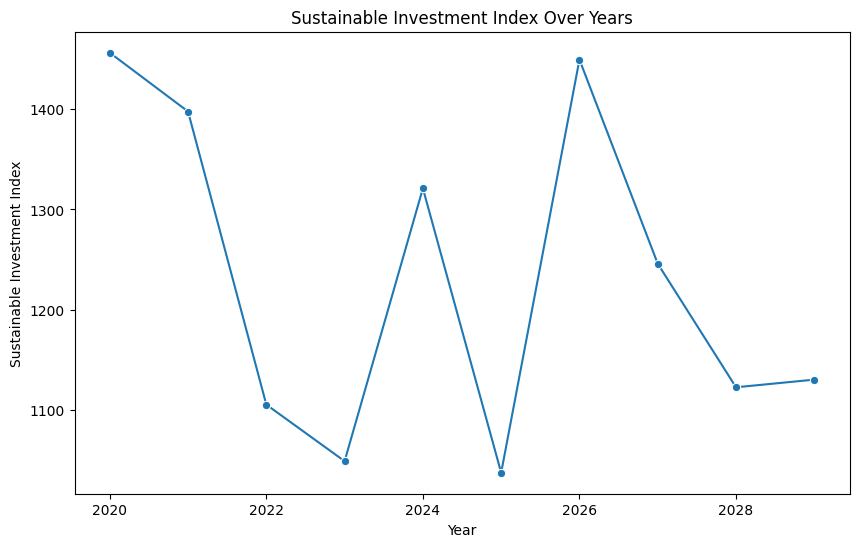

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='SustainableInvestmentIndex', data=market_data, marker='o')
plt.title('Sustainable Investment Index Over Years')
plt.xlabel('Year')
plt.ylabel('Sustainable Investment Index')
plt.show()

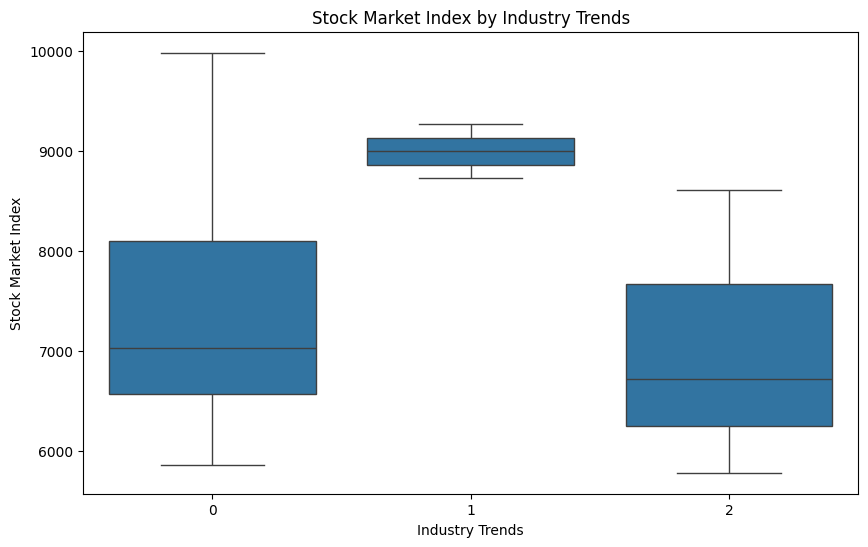

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='IndustryTrends', y='StockMarketIndex', data=market_data)
plt.title('Stock Market Index by Industry Trends')
plt.xlabel('Industry Trends')
plt.ylabel('Stock Market Index')
plt.show()

In [17]:
# Explore the esg_data dataset
print("ESG Data EDA:\n")
print(esg_data.info())

ESG Data EDA:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Company                   100 non-null    object 
 1   ESGScores                 100 non-null    float64
 2   EnvironmentalPerformance  100 non-null    float64
 3   SocialPerformance         100 non-null    float64
 4   GovernancePerformance     100 non-null    float64
 5   ESGRating                 100 non-null    int64  
 6   ESGCategory               100 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 5.6+ KB
None


In [18]:
print(esg_data.describe())

        ESGScores  EnvironmentalPerformance  SocialPerformance  \
count  100.000000                100.000000         100.000000   
mean    48.333178                 54.985556          48.746089   
std     27.004917                 28.528966          31.447253   
min      0.651729                  0.567253           0.853791   
25%     24.998389                 31.978701          19.037744   
50%     47.665905                 56.450050          49.234114   
75%     71.803061                 79.763021          77.453723   
max     99.223769                 99.565446          99.535756   

       GovernancePerformance   ESGRating  ESGCategory  
count             100.000000  100.000000   100.000000  
mean               48.339292    2.460000     1.540000  
std                29.432126    1.731584     1.131906  
min                 0.072163    0.000000     0.000000  
25%                22.769405    1.000000     0.750000  
50%                47.337290    2.000000     2.000000  
75%          

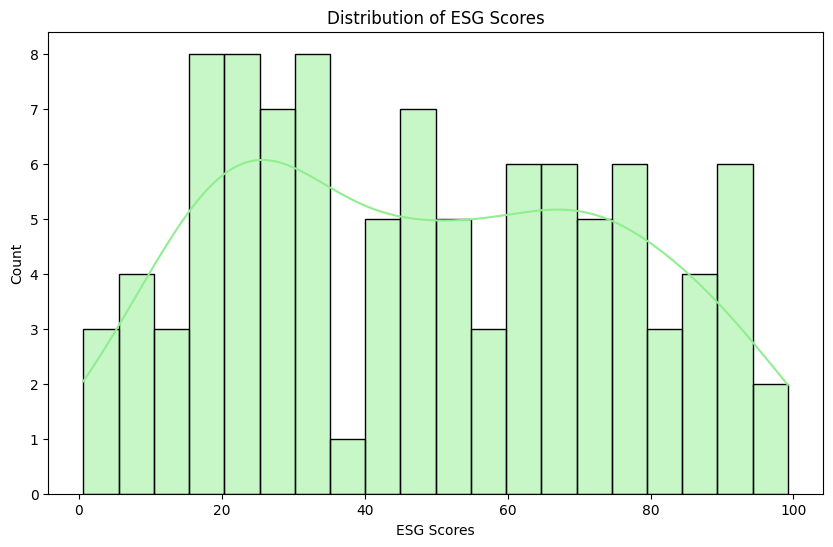

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(esg_data['ESGScores'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of ESG Scores')
plt.xlabel('ESG Scores')
plt.ylabel('Count')
plt.show()

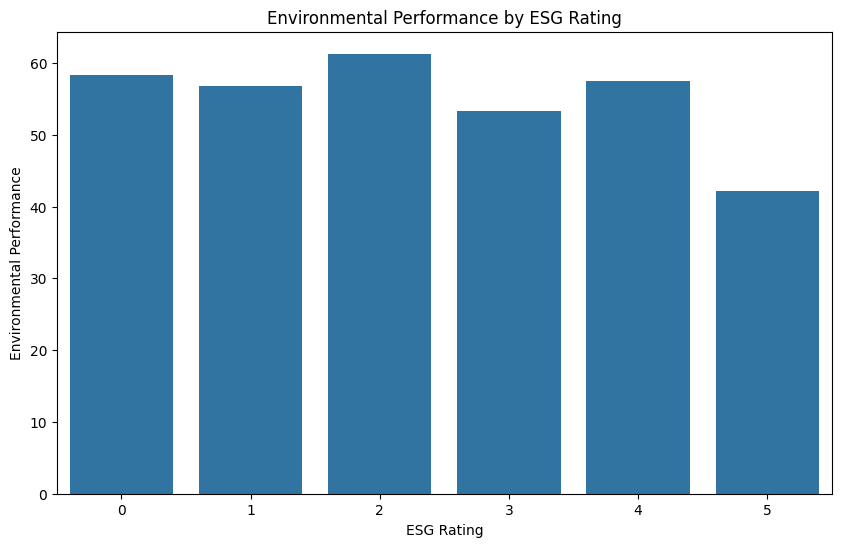

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ESGRating', y='EnvironmentalPerformance', data=esg_data, ci=None)
plt.title('Environmental Performance by ESG Rating')
plt.xlabel('ESG Rating')
plt.ylabel('Environmental Performance')
plt.show()

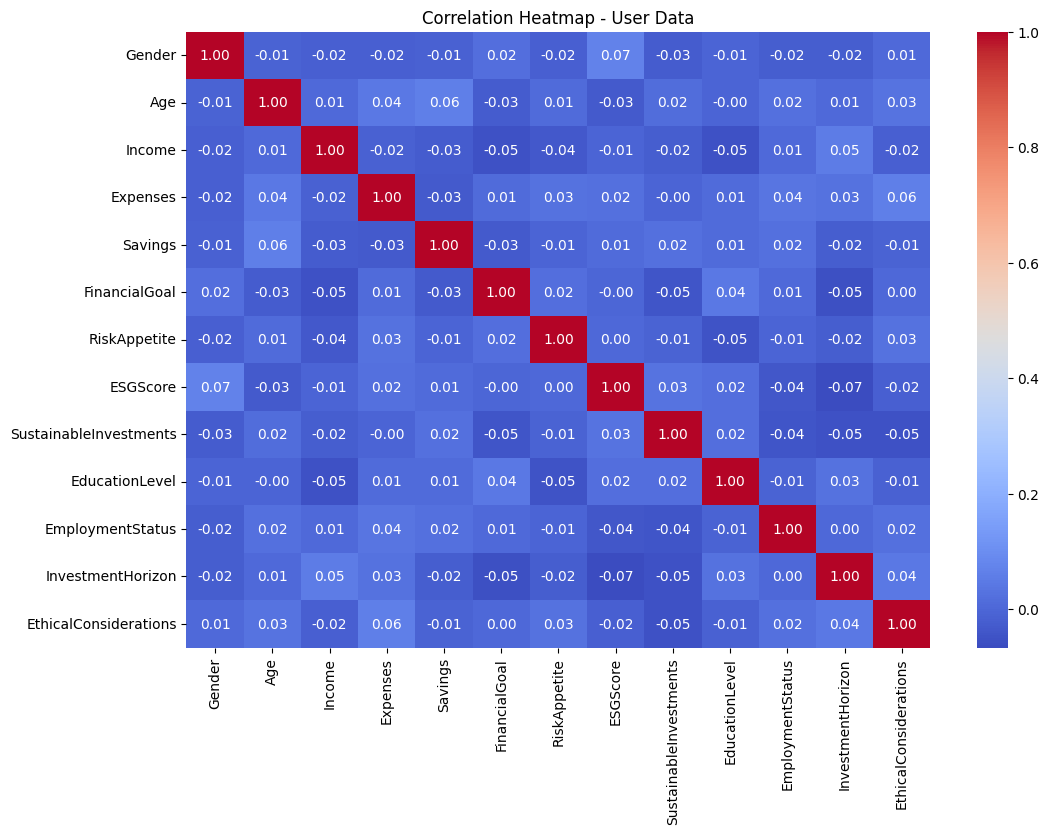

In [21]:
# Correlation analysis
user_corr = user_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(user_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - User Data')
plt.show()

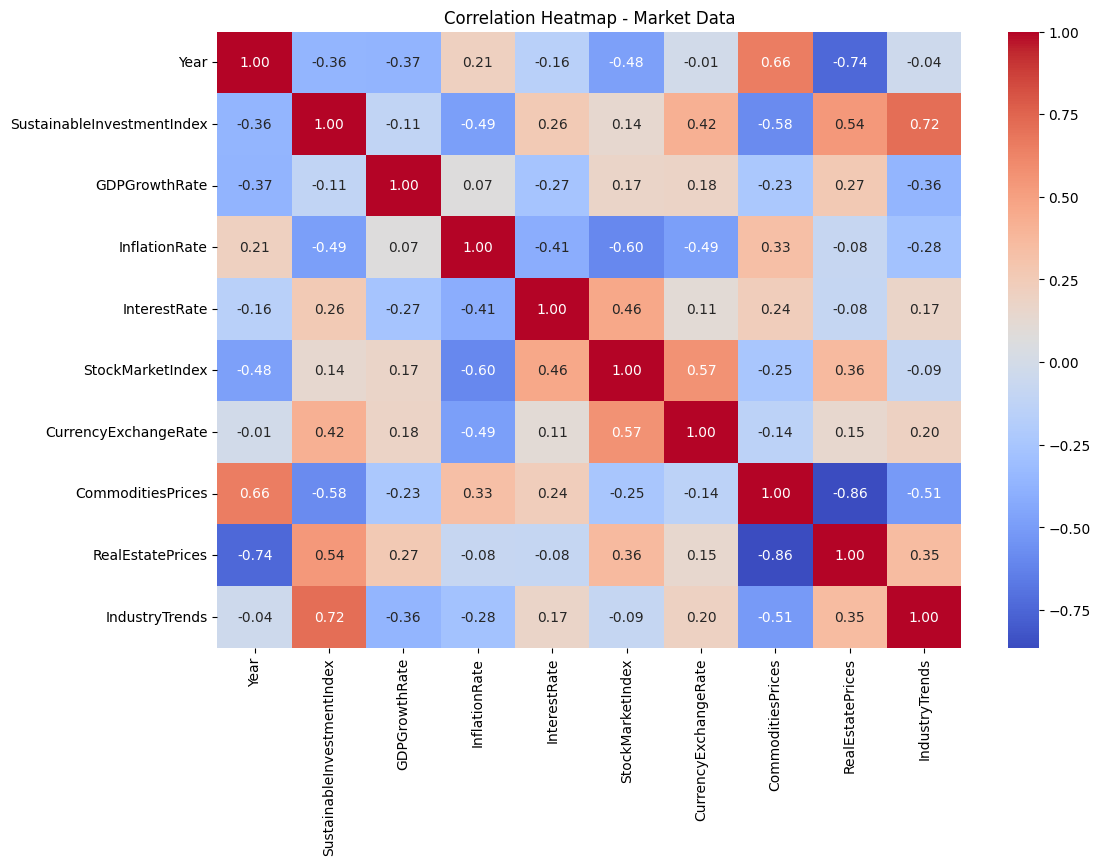

In [22]:
market_corr = market_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(market_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Market Data')
plt.show()

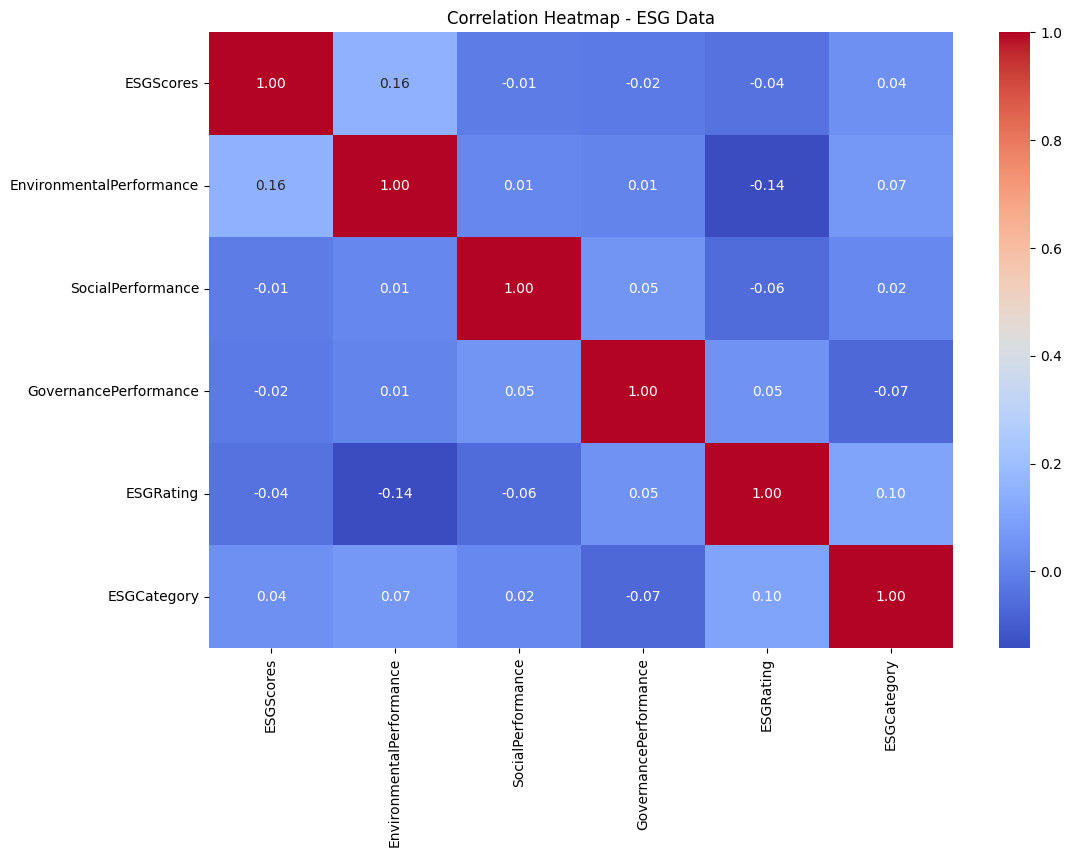

In [23]:
esg_corr = esg_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(esg_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - ESG Data')
plt.show()

In [24]:
# Preprocess User Data
def preprocess_user_data(user_data):
    # Standardize numerical features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(user_data[['Age', 'Income', 'Expenses', 'Savings', 'FinancialGoal', 'RiskAppetite', 'ESGScore']])
    user_data[['Age', 'Income', 'Expenses', 'Savings', 'FinancialGoal', 'RiskAppetite', 'ESGScore']] = scaled_features

    # Apply PCA
    pca = PCA(n_components=3)
    pca_features = pca.fit_transform(user_data[['Age', 'Income', 'Expenses', 'Savings', 'FinancialGoal', 'RiskAppetite', 'ESGScore']])
    user_data[['PCA1', 'PCA2', 'PCA3']] = pca_features

    return user_data

In [25]:
# Preprocess Market Data
def preprocess_market_data(market_data):
    # Standardize numerical features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(market_data[['SustainableInvestmentIndex', 'GDPGrowthRate', 'InflationRate', 'InterestRate', 'StockMarketIndex', 'CurrencyExchangeRate', 'CommoditiesPrices', 'RealEstatePrices']])
    market_data[['SustainableInvestmentIndex', 'GDPGrowthRate', 'InflationRate', 'InterestRate', 'StockMarketIndex', 'CurrencyExchangeRate', 'CommoditiesPrices', 'RealEstatePrices']] = scaled_features

    # Apply PCA
    pca = PCA(n_components=3)
    pca_features = pca.fit_transform(market_data[['SustainableInvestmentIndex', 'GDPGrowthRate', 'InflationRate', 'InterestRate', 'StockMarketIndex', 'CurrencyExchangeRate', 'CommoditiesPrices', 'RealEstatePrices']])
    market_data[['PCA1', 'PCA2', 'PCA3']] = pca_features

    return market_data

In [26]:
# Preprocess ESG Data
def preprocess_esg_data(esg_data):
    # Standardize numerical features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(esg_data[['ESGScores', 'EnvironmentalPerformance', 'SocialPerformance', 'GovernancePerformance']])
    esg_data[['ESGScores', 'EnvironmentalPerformance', 'SocialPerformance', 'GovernancePerformance']] = scaled_features

    # Apply PCA
    pca = PCA(n_components=3)
    pca_features = pca.fit_transform(esg_data[['ESGScores', 'EnvironmentalPerformance', 'SocialPerformance', 'GovernancePerformance']])
    esg_data[['PCA1', 'PCA2', 'PCA3']] = pca_features

    return esg_data

In [27]:
# Preprocess and train models for each dataset
user_data_processed = preprocess_user_data(user_data)
market_data_processed = preprocess_market_data(market_data)
esg_data_processed = preprocess_esg_data(esg_data)

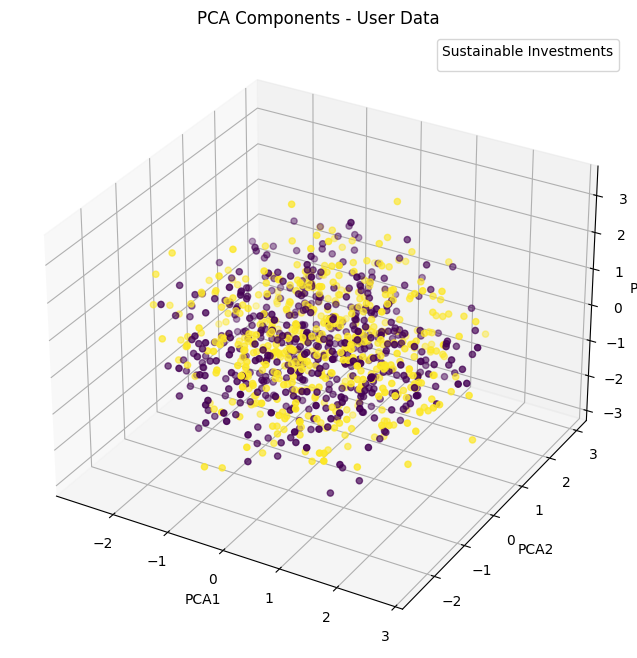

In [28]:
# Plot 3D graphs for PCA components in User Data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(user_data_processed['PCA1'], user_data_processed['PCA2'], user_data_processed['PCA3'], c=user_data_processed['SustainableInvestments'], cmap='viridis')
ax.set_title('PCA Components - User Data')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.legend(title='Sustainable Investments')
plt.show()

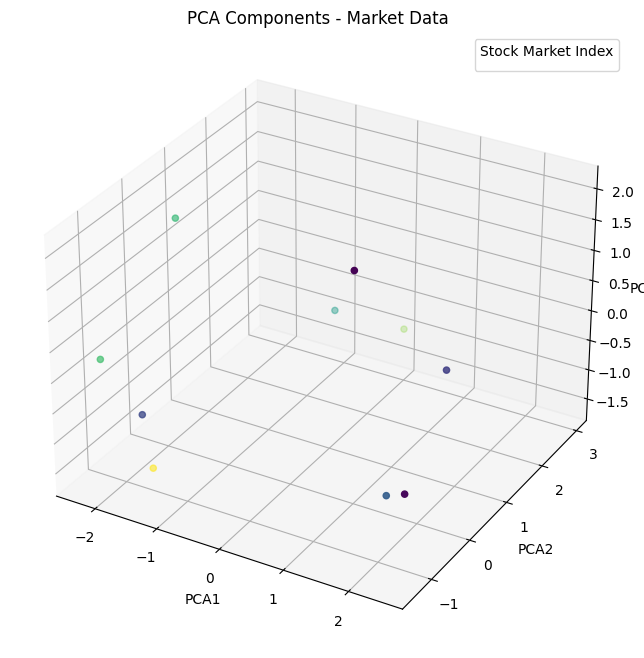

In [29]:
# Plot 3D graphs for PCA components in Market Data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(market_data_processed['PCA1'], market_data_processed['PCA2'], market_data_processed['PCA3'], c=market_data_processed['StockMarketIndex'], cmap='viridis')
ax.set_title('PCA Components - Market Data')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.legend(title='Stock Market Index')
plt.show()

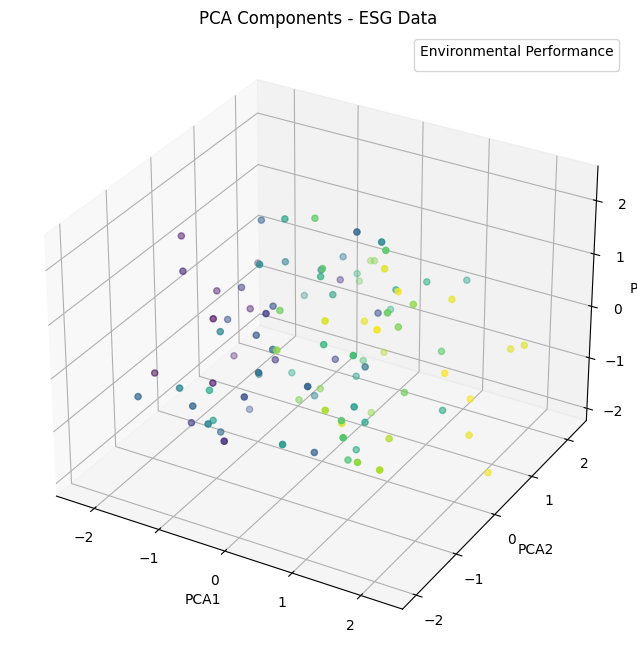

In [30]:
# Plot 3D graphs for PCA components in ESG Data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(esg_data_processed['PCA1'], esg_data_processed['PCA2'], esg_data_processed['PCA3'], c=esg_data_processed['EnvironmentalPerformance'], cmap='viridis')
ax.set_title('PCA Components - ESG Data')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.legend(title='Environmental Performance')
plt.show()

In [31]:
# Train Linear Regression Model
def train_linear_regression(X_train, y_train):
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    return linreg

In [32]:
# Train Linear Regression models after imputation
linreg_user_data = train_linear_regression(user_data_processed[['PCA1', 'PCA2', 'PCA3']], user_data_processed['SustainableInvestments'])
linreg_market_data = train_linear_regression(market_data_processed[['PCA1', 'PCA2', 'PCA3']], market_data_processed['StockMarketIndex'])
linreg_esg_data = train_linear_regression(esg_data_processed[['PCA1', 'PCA2', 'PCA3']], esg_data_processed['EnvironmentalPerformance'])

In [33]:
# Function to plot linear regression predictions in 3D
def plot_linreg_predictions_3d(X_train, y_train, linreg_model, title):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Create meshgrid for PCA1, PCA2, PCA3
    pca1_mesh, pca2_mesh = np.meshgrid(np.linspace(X_train['PCA1'].min(), X_train['PCA1'].max(), 100),
                                        np.linspace(X_train['PCA2'].min(), X_train['PCA2'].max(), 100))
    pca3_mesh = np.full_like(pca1_mesh, X_train['PCA3'].mean())  # Use mean for PCA3

    # Flatten meshgrid data
    pca1_flat = pca1_mesh.flatten()
    pca2_flat = pca2_mesh.flatten()
    pca3_flat = pca3_mesh.flatten()

    # Predict using the linear regression model
    pca_data = np.array([pca1_flat, pca2_flat, pca3_flat]).T
    pca_pred = linreg_model.predict(pca_data).reshape(pca1_mesh.shape)

    # Plot 3D surface for predictions
    surf = ax.plot_surface(pca1_mesh, pca2_mesh, pca_pred, cmap='viridis', alpha=0.6)

    # Add colorbar
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

    # Set labels and title
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('Predicted Value')
    ax.set_title(title)

    # Show the plot
    plt.show()

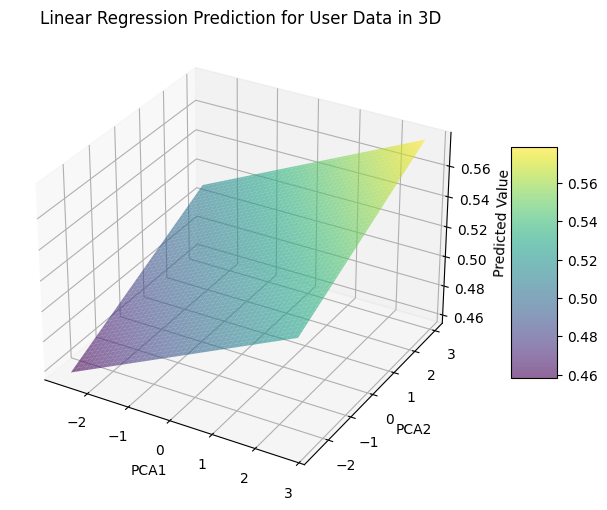

In [34]:
# Plot linear regression predictions for User Data in 3D
plot_linreg_predictions_3d(user_data_processed[['PCA1', 'PCA2', 'PCA3']], user_data_processed['SustainableInvestments'], linreg_user_data, 'Linear Regression Prediction for User Data in 3D')

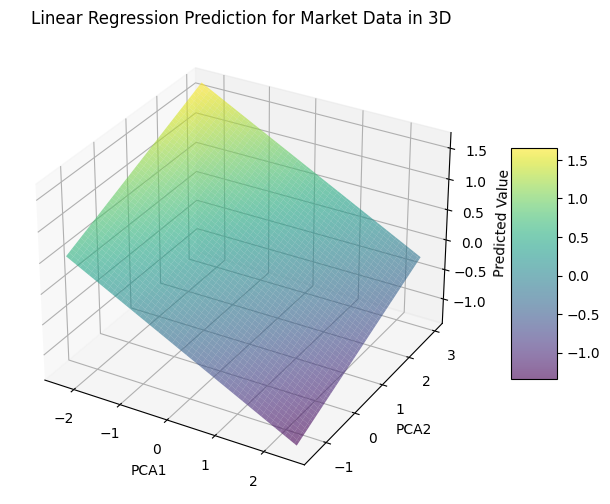

In [35]:
# Plot linear regression predictions for Market Data in 3D
plot_linreg_predictions_3d(market_data_processed[['PCA1', 'PCA2', 'PCA3']], market_data_processed['StockMarketIndex'], linreg_market_data, 'Linear Regression Prediction for Market Data in 3D')

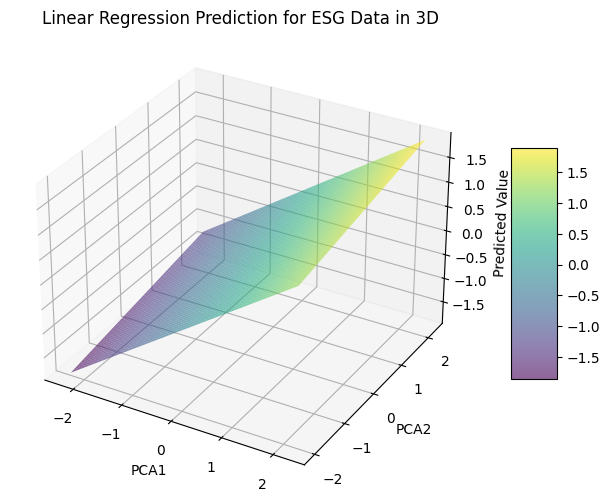

In [36]:
# Plot linear regression predictions for ESG Data in 3D
plot_linreg_predictions_3d(esg_data_processed[['PCA1', 'PCA2', 'PCA3']], esg_data_processed['EnvironmentalPerformance'], linreg_esg_data, 'Linear Regression Prediction for ESG Data in 3D')

In [37]:
# Function to suggest actions based on predictions and user profile
def suggest_actions(user_data, user_investment_pred, market_investment_pred, esg_investment_pred):
    suggested_actions = []
    for idx in range(len(user_data)):
        user_pred = user_investment_pred[idx]
        market_pred = market_investment_pred[idx % len(market_investment_pred)]
        esg_pred = esg_investment_pred[idx % len(esg_investment_pred)]

        # Risk Assessment
        risk_profile = "Aggressive" if user_data['RiskAppetite'].iloc[idx] > 0 else "Conservative"

        # Diversification
        diversification_suggestion = "Consider diversifying your portfolio across different asset classes and regions to reduce risk."

        # Goal-Based Investing
        goal_based_suggestion = f"Based on your financial goal ({user_data['FinancialGoal'].iloc[idx]}), consider allocating {user_pred}% of your portfolio to sustainable investments."

        # ESG and Sustainable Investing
        if esg_pred > market_pred:
            esg_suggestion = f"Invest more in ESG-related assets ({esg_pred} > {market_pred})."
        else:
            esg_suggestion = f"Allocate a portion of your portfolio to ESG investments ({esg_pred} < {market_pred})."

        # Robo-Advisory Services
        robo_advisory_suggestion = "Explore robo-advisory services for automated portfolio management and optimization."

        # Educational Resources
        education_suggestion = "Access educational resources to enhance your investment knowledge and decision-making skills."

        # Aggregate suggestions
        suggested_actions.append({
            'Risk Profile': risk_profile,
            'Diversification': diversification_suggestion,
            'Goal-Based Investing': goal_based_suggestion,
            'ESG Investing': esg_suggestion,
            'Robo-Advisory Services': robo_advisory_suggestion,
            'Educational Resources': education_suggestion
        })

    return suggested_actions

In [38]:
# Call the function with the datasets and predictions
user_investment_pred = linreg_user_data.predict(user_data_processed[['PCA1', 'PCA2', 'PCA3']])
market_investment_pred = linreg_market_data.predict(market_data_processed[['PCA1', 'PCA2', 'PCA3']])
esg_investment_pred = linreg_esg_data.predict(esg_data_processed[['PCA1', 'PCA2', 'PCA3']])
suggested_actions = suggest_actions(user_data, user_investment_pred, market_investment_pred, esg_investment_pred)

In [39]:
# Display suggested actions in a table format
actions_df = pd.DataFrame(suggested_actions)
print(actions_df.head(10))

   Risk Profile                                    Diversification  \
0    Aggressive  Consider diversifying your portfolio across di...   
1  Conservative  Consider diversifying your portfolio across di...   
2  Conservative  Consider diversifying your portfolio across di...   
3    Aggressive  Consider diversifying your portfolio across di...   
4    Aggressive  Consider diversifying your portfolio across di...   
5  Conservative  Consider diversifying your portfolio across di...   
6  Conservative  Consider diversifying your portfolio across di...   
7  Conservative  Consider diversifying your portfolio across di...   
8  Conservative  Consider diversifying your portfolio across di...   
9    Aggressive  Consider diversifying your portfolio across di...   

                                Goal-Based Investing  \
0  Based on your financial goal (-0.3615411117580...   
1  Based on your financial goal (-1.4640270863357...   
2  Based on your financial goal (-0.0013191994059...   
3  Ba

In [40]:
# Save suggested actions as CSV
actions_df.to_csv('/content/suggested_actions.csv', index=False)